e al Document

---

# Project Documentation: Time Series Analysis of Nvidia Stock a- nd Airline Passengers Data

## 1. Introduction
This project involves time series analysis of two datasets: Nvidia (NVDA) stock prices and airline passengers data. The aim is to perform various statistical analyses and model predictions using techniques like moving averages, exponential moving averages, ARIMA, and SARIMA models.

## 2. Datasets
- **Nvidia Stock Data**: Historical stock prices for Nvidia Corporation fetched using the `yfinance` library.
- **Airline Passengers Data**: Monthly totals of international airline passengers from 1949 to 1960.

## 3. Libraries Used
- `pandas`: Data manipulation and analysis.
- `numpy`: Numerical operations.
- `matplotlib`: Data visualization.
- `statsmodels`: Statistical modeling.
- `yfinance`: Fetching financial data.

## 4. Data Loading and Preprocessing
### Nvidia Stock Data
- Data for Nvidia stock prices was downloaded and loaded into a DataFrame. 
- The data was inspected and cleaned for any missing values.

### Airline Passengers Data
- Data for airline passengers was read from a CSV file.
- Missing values were handled and the 'Month' column was converted to datetime format for proper time series analysis.

## 5. Exploratory Data Analysis (EDA)
### Nvidia Stock Data
- **Plotting Open Prices**: The opening prices of Nvidia stocks were plotted to observe the trend over time.
- **Simple Moving Averages (SMA)**: Calculated and plotted to smooth out short-term fluctuations and highlight longer-term trends.
- **Exponential Moving Averages (EMA)**: Calculated and plotted to give more weight to recent prices, thereby capturing more recent trends more effectively.

### Airline Passengers Data
- **Plotting Passengers Data**: The data was plotted to visualize the monthly totals of international airline passengers.
- **ADF Test for Stationarity**: Conducted to check if the time series is stationary. Stationarity is essential for accurate modeling in time series analysis.
- **Differencing for Stationarity**: Applied to make the time series data stationary by removing trends and seasonality.

## 6. Modeling
### ARIMA Model for Airline Passengers Data
- **Train-Test Split**: The data was divided into training and testing sets to evaluate the performance of the ARIMA model.
- **ARIMA Model Creation and Fitting**: An ARIMA model was fitted to the training data and used to make predictions.

### SARIMA Model for Airline Passengers Data
- **Seasonality Consideration**: The airline passengers data shows clear seasonal patterns. To model this, a Seasonal ARIMA (SARIMA) model was used.
- **SARIMA Model Creation and Fitting**: A SARIMA model was fitted to the training data and used to make predictions. This model incorporates both seasonal and non-seasonal factors in the time series data.

## 7. Definitions of Important Models and Concepts
### Moving Averages (MA)
- **Simple Moving Average (SMA)**: An average of the data points within a certain window. It smooths out short-term fluctuations and highlights longer-term trends or cycles.
- **Exponential Moving Average (EMA)**: A type of moving average that places a greater weight and significance on the most recent data po- ints. This makes it more responsive to recent price changes compared to SMA.

### Stationarity
A time series is said to be stationary if its statistical properties such as mean, variance, and autocorrelation are all constant over time. Stationarity is important for time series modeli- ng because many statistical methods assume or require a stationary time series.

### Differencing
A technique used to make a non-stationary time series stationary by subtracting the previous observation - from the current observation. It helps remove trends and seasonality from the data.

### ARIMA Model
ARIMA (AutoRegressive Integrated Moving Average) is a class of models that explains a given time series based on its own past values (autoregressive part), the differenced values (integrated part), an- d a moving average model applied to the lagged forecast errors (moving average part).

### SARIMA Model
SARIMA (Seasonal AutoRegressive Integrated Moving Average) extends the ARIMA model by explicitly modeling seasonal effects. It incorporates seasonal autoregressive (SAR), seasonal differencing (SD), and seasonal moving average (SMA) components along with non-seasonal components. This model is particular- ly useful for time series data with strong seasonal patterns.

### ADF Test (Augmented Dickey-Fuller Test)
A statistical test used to determine if a time series is stationary. It tests the null hypothesis that a unit root is present in a time series sample. A lower p-value indicates that the null hypothesis can be rejected, suggesting the time series is stationary.

## 8. Data Visualization
Visualizations were used extensively to understand data trends and patterns. Examples include:
- Line plots to visualize stock prices o- ver time.
- Comparison of actual vs. predicted values in time series forecasting.

## 9. Model Evaluation Metrics
To evaluate the performance of the time series models, metrics such as Mean Absolute Error (MAE) and Root Mean Squar- ed Error (RMSE) were used. These metrics help quantify the accuracy of the predictions.

## 10. Hyperparameter Tuning
For both ARIMA and SARIMA models, parameters such as p (autoregressive order), d (differencing order), q (moving average order), P (seasonal autoregressive order), D (seasonal differencing order),-  Q (seasonal moving average order), and m (seasonal period) were tuned to achieve the best model fit.

## 11. Conclusion
This project demonstrated the application of various time series analysis techniques on Nvidia stock data and airline passengers data. Techniques such as moving averages, exponential moving averages, differencing, ARIMA, and SARIMA models were used to analyze and forecast the time series data. The results provide insights into the t

Please review this final document and let me know if there are any additional details or sections you would like to include.

In [ ]:
# first install yfinance
import yfinance as yf
import pandas as pd
from datetime import datetime

In [70]:
# Fetch data for Nvidia Corporation
Nvda_data = yf.download('NVDA')
# Display the first few rows of the fetched data
Nvda_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000
1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000


In [68]:
Nvda_data.index

DatetimeIndex(['1999-01-22', '1999-01-25', '1999-01-26', '1999-01-27',
               '1999-01-28', '1999-01-29', '1999-02-01', '1999-02-02',
               '1999-02-03', '1999-02-04',
               ...
               '2024-06-14', '2024-06-17', '2024-06-18', '2024-06-20',
               '2024-06-21', '2024-06-24', '2024-06-25', '2024-06-26',
               '2024-06-27', '2024-06-28'],
              dtype='datetime64[ns]', name='Date', length=6400, freq=None)

<Axes: xlabel='Date'>

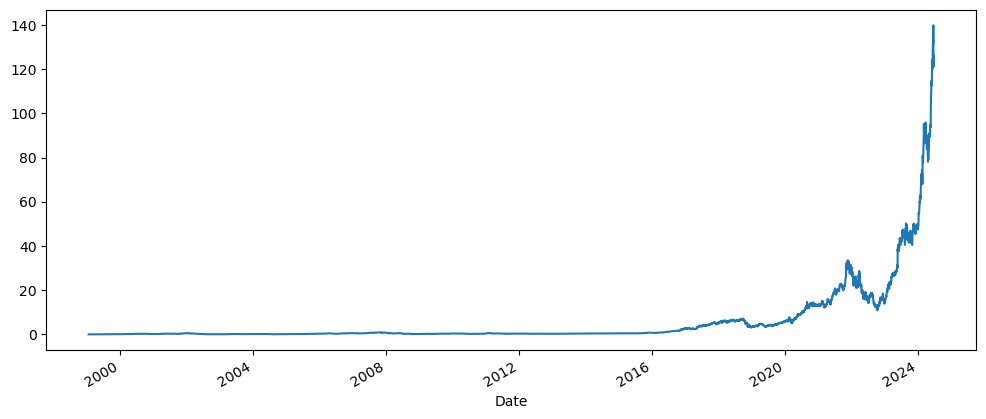

In [153]:
# plotting entire data
# Simple moving average-helps in smoothing of graph
Nvda_data['Open'].plot(figsize=(12,5))

In [86]:
Nvda_data['Open:100 days rolling']=Nvda_data['Open'].rolling(window=100,min_periods=5).mean()

<Axes: xlabel='Date'>

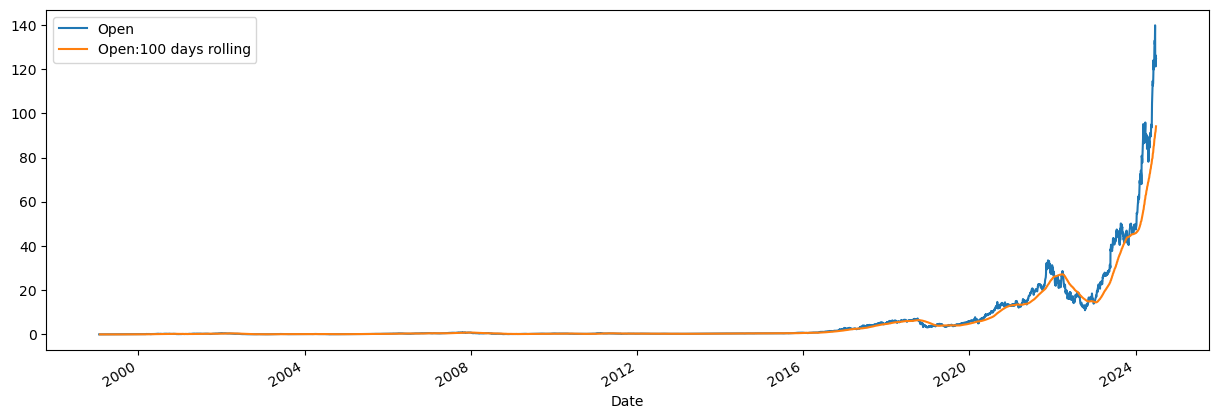

In [88]:
Nvda_data[['Open','Open:100 days rolling']].plot(figsize=(15,5))

<Axes: xlabel='Date'>

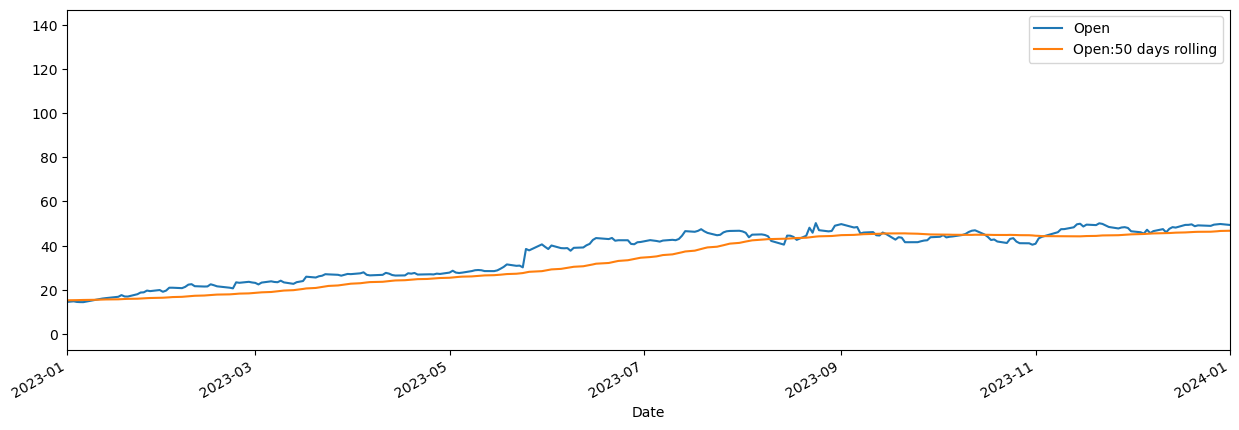

In [48]:
#plotting by focusing on data from 2023-2024
Nvda_data[['Open','Open:50 days rolling']].plot(xlim=['2023-01-01','2024-01-01'],figsize=(15,5))

In [60]:
# rolling window 10,50,80,120 days
Nvda_data['Open:10 days rolling']=Nvda_data['Open'].rolling(window=10,min_periods=2).mean()
Nvda_data['Open:50 days rolling']=Nvda_data['Open'].rolling(window=50,min_periods=2).mean()
Nvda_data['Open:80 days rolling']=Nvda_data['Open'].rolling(window=80,min_periods=2).mean()
Nvda_data['Open:120 days rolling']=Nvda_data['Open'].rolling(window=120,min_periods=2).mean()

<Axes: xlabel='Date'>

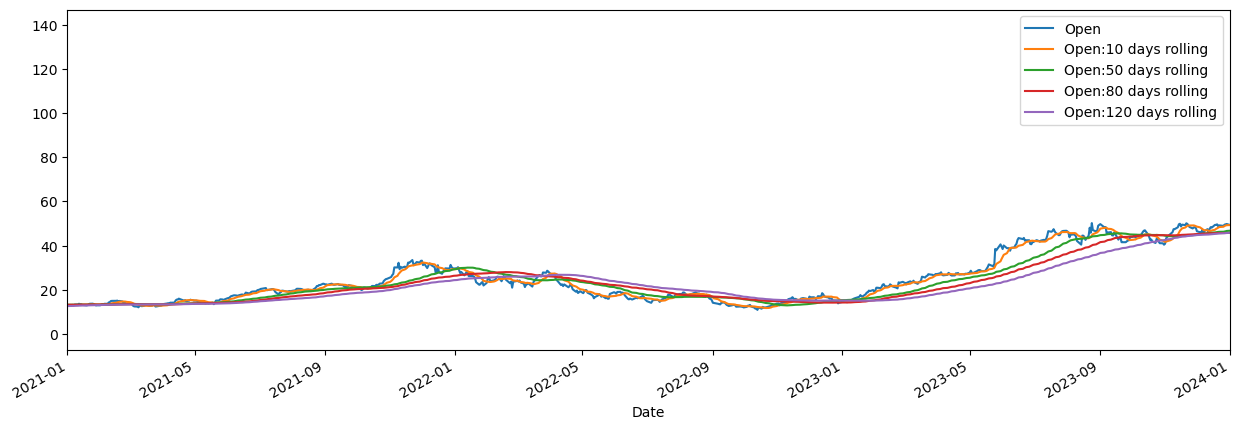

In [64]:
#Plotting rolling window 10,50,80,120 days
Nvda_data[['Open','Open:10 days rolling','Open:50 days rolling','Open:80 days rolling','Open:120 days rolling']].plot(xlim=['2021-01-01','2024-01-01'],figsize=(15,5))

<Axes: xlabel='Date'>

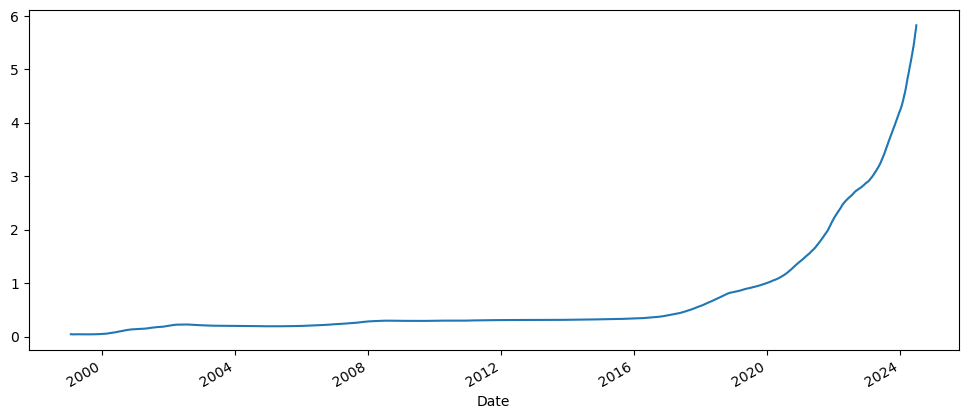

In [66]:
# expanding
#Cumulative moving average-CMA
Nvda_data['Open'].expanding().mean().plot(figsize=(12,5))

In [140]:
# EMA of Nvidia shares- Exponential moving average-Removing lags
# Smoothing factor - 0.1
Nvda_data['EMA_0.1']=Nvda_data['Open'].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='Date'>

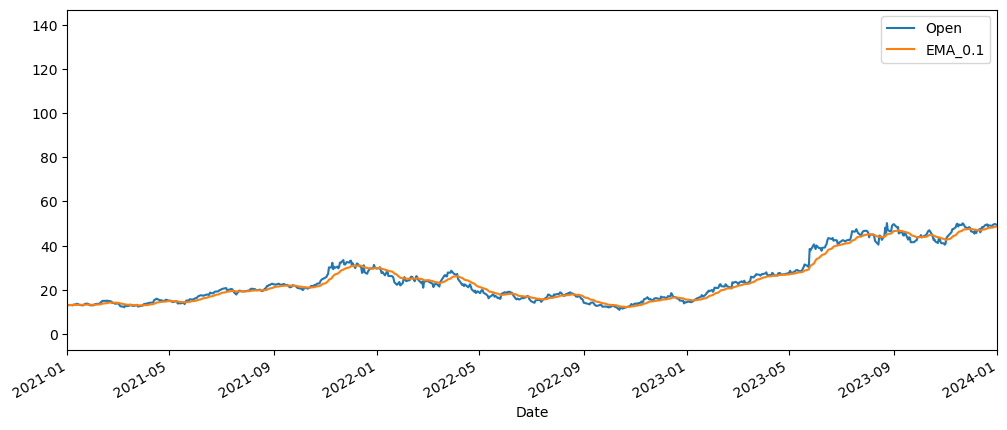

In [108]:
#plotting EMA
Nvda_data[['Open','EMA_0.1']].plot(xlim=['2021-01-01','2024-01-01'],figsize=(12,5))

In [110]:
# Smoothing factor - 0.2,0.4,0.6
Nvda_data['EMA_0.2']=Nvda_data['Open'].ewm(alpha=0.2,adjust=False).mean()
Nvda_data['EMA_0.4']=Nvda_data['Open'].ewm(alpha=0.4,adjust=False).mean()
Nvda_data['EMA_0.6']=Nvda_data['Open'].ewm(alpha=0.6,adjust=False).mean()

<Axes: xlabel='Date'>

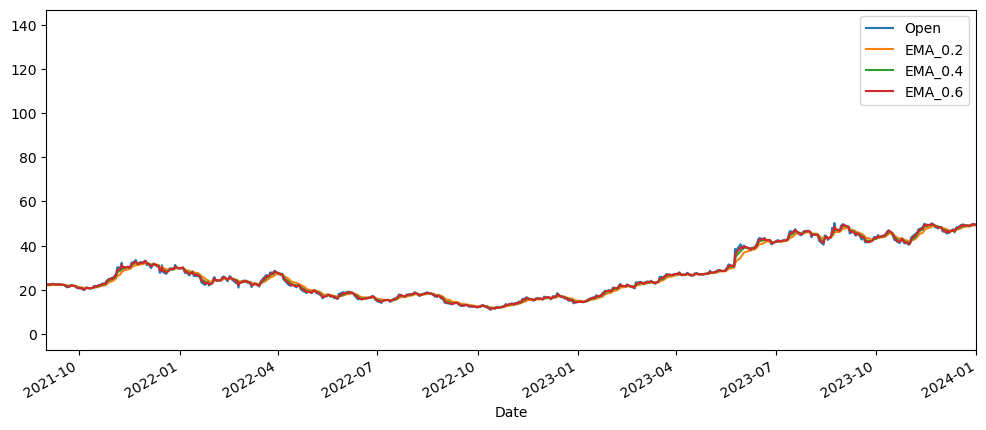

In [138]:
#plotting EMA -0.2,0.4,0.6
Nvda_data[['Open','EMA_0.2','EMA_0.4','EMA_0.6']].plot(xlim=['2021-09-01','2024-01-01'],figsize=(12,5))

In [148]:
# Smoothing factor - 0.1,EMA_5days
Nvda_data['EMA_5days']=Nvda_data['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

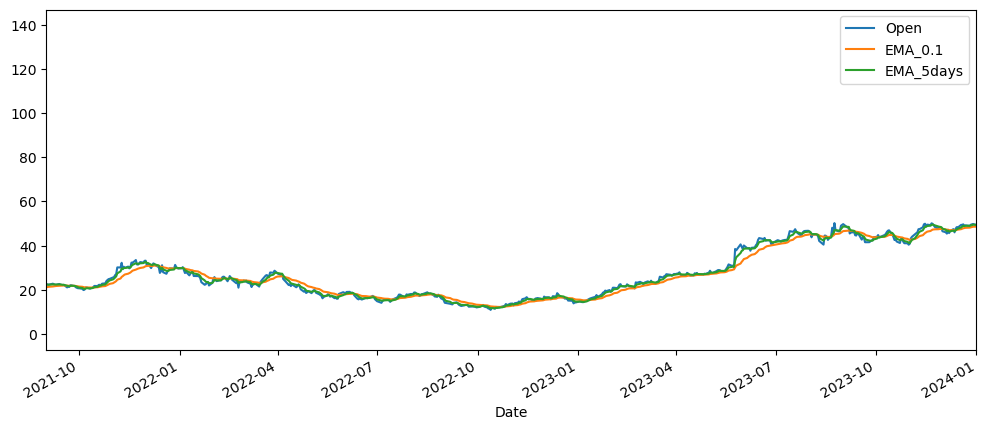

In [150]:
#plotting EMA -0.1, EMA_5days
Nvda_data[['Open','EMA_0.1','EMA_5days']].plot(xlim=['2021-09-01','2024-01-01'],figsize=(12,5))

In [155]:
#ARIMA
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [163]:
df_airline=pd.read_csv('Downloads/airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [165]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [167]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [169]:
df_airline.dropna(axis=0,inplace=True)

In [171]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [173]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [175]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [177]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [179]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [185]:
df_airline.set_index('Month',inplace=True)

In [187]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

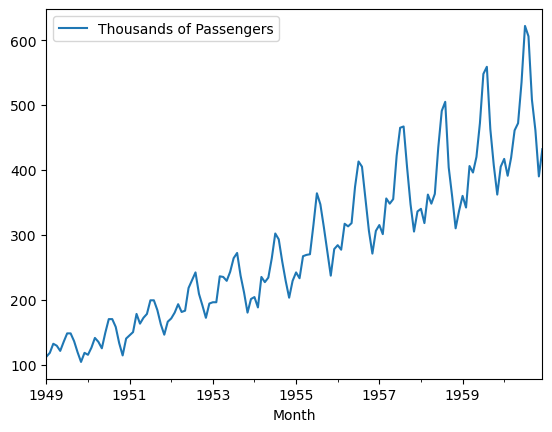

In [189]:
df_airline.plot()

In [191]:
from statsmodels.tsa.stattools import adfuller

In [193]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [195]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060597
p- value: 0.9918802434376411
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [197]:
# Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [199]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [201]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.829266824169992
p- value: 0.0542132902838265
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [203]:
# Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [205]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468527
p- value: 2.732891850014085e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [207]:
# 12 months 
# Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [209]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924805
p- value: 0.011551493085514982
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [211]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

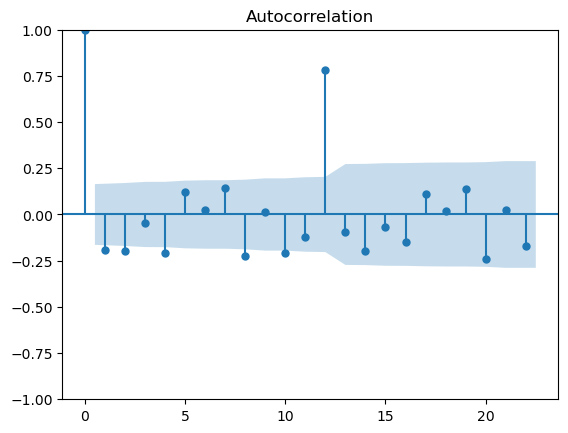

In [213]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

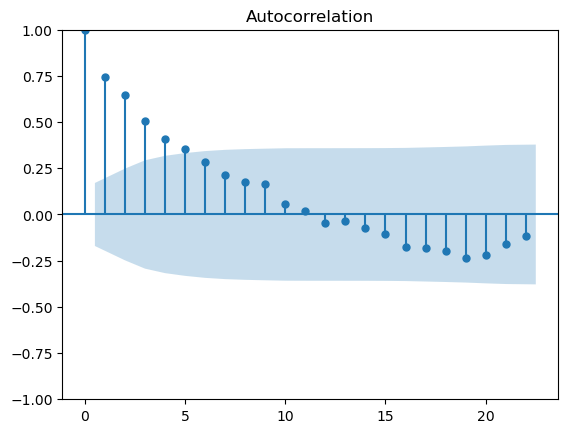

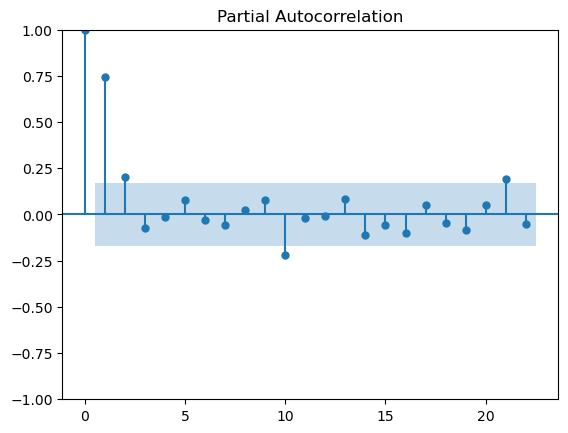

In [222]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

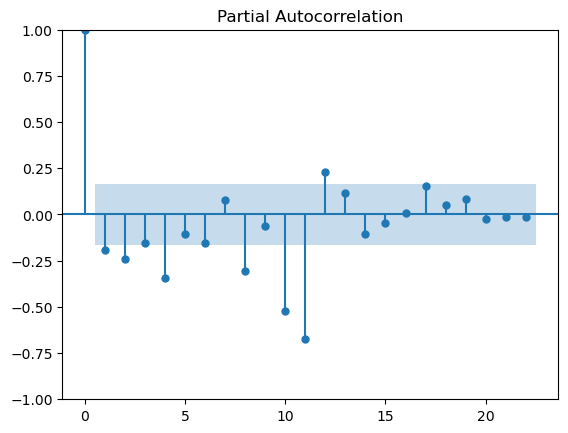

In [224]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

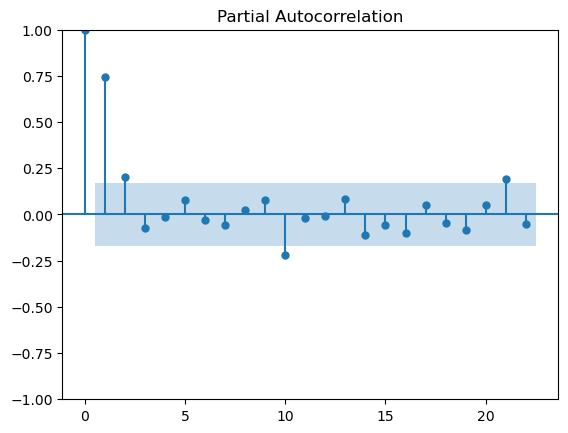

In [226]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [228]:
# split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [230]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [232]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [234]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [236]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [264]:
# creating a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [240]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [266]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=(0,2,0))
results_ARIMA = model_ARIMA.fit()
print(results_ARIMA.summary())

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                  SARIMAX Results                                  
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(0, 2, 0)   Log Likelihood                -385.792
Date:                     Sat, 29 Jun 2024   AIC                            773.584
Time:                             20:04:37   BIC                            775.991
Sample:                         01-01-1949   HQIC                           774.550
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       714.5858    102.414      6.977      0.000     513.858     915.314
Ljung-Box (L1) (Q):                   4.59   Jarque-Bera (JB):                 1.74
Prob(Q)

In [268]:
model_Arima_fit=model_ARIMA.fit()

In [270]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(0, 2, 0)   Log Likelihood                -385.792
Date:                     Sat, 29 Jun 2024   AIC                            773.584
Time:                             20:05:36   BIC                            775.991
Sample:                         01-01-1949   HQIC                           774.550
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       714.5858    102.414      6.977      0.000     513.858     915.314
===================================================================================
Ljung-Box (L1) (Q):                   4.59   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.03   Prob(JB):                         0.42
Heteroskedasticity (H):               3.19   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [272]:
test_data


,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [274]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [276]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [278]:
pred

1956-01-01     319.0
1956-02-01     360.0
1956-03-01     401.0
1956-04-01     442.0
1956-05-01     483.0
1956-06-01     524.0
1956-07-01     565.0
1956-08-01     606.0
1956-09-01     647.0
1956-10-01     688.0
1956-11-01     729.0
1956-12-01     770.0
1957-01-01     811.0
1957-02-01     852.0
1957-03-01     893.0
1957-04-01     934.0
1957-05-01     975.0
1957-06-01    1016.0
1957-07-01    1057.0
1957-08-01    1098.0
1957-09-01    1139.0
1957-10-01    1180.0
1957-11-01    1221.0
1957-12-01    1262.0
1958-01-01    1303.0
1958-02-01    1344.0
1958-03-01    1385.0
1958-04-01    1426.0
1958-05-01    1467.0
1958-06-01    1508.0
1958-07-01    1549.0
1958-08-01    1590.0
1958-09-01    1631.0
1958-10-01    1672.0
1958-11-01    1713.0
1958-12-01    1754.0
1959-01-01    1795.0
1959-02-01    1836.0
1959-03-01    1877.0
1959-04-01    1918.0
1959-05-01    1959.0
1959-06-01    2000.0
1959-07-01    2041.0
1959-08-01    2082.0
1959-09-01    2123.0
1959-10-01    2164.0
1959-11-01    2205.0
1959-12-01   

In [280]:
residuals

Month
1956-01-01     -35.0
1956-02-01     -83.0
1956-03-01     -84.0
1956-04-01    -129.0
1956-05-01    -165.0
1956-06-01    -150.0
1956-07-01    -152.0
1956-08-01    -201.0
1956-09-01    -292.0
1956-10-01    -382.0
1956-11-01    -458.0
1956-12-01    -464.0
1957-01-01    -496.0
1957-02-01    -551.0
1957-03-01    -537.0
1957-04-01    -586.0
1957-05-01    -620.0
1957-06-01    -594.0
1957-07-01    -592.0
1957-08-01    -631.0
1957-09-01    -735.0
1957-10-01    -833.0
1957-11-01    -916.0
1957-12-01    -926.0
1958-01-01    -963.0
1958-02-01   -1026.0
1958-03-01   -1023.0
1958-04-01   -1078.0
1958-05-01   -1104.0
1958-06-01   -1073.0
1958-07-01   -1058.0
1958-08-01   -1085.0
1958-09-01   -1227.0
1958-10-01   -1313.0
1958-11-01   -1403.0
1958-12-01   -1417.0
1959-01-01   -1435.0
1959-02-01   -1494.0
1959-03-01   -1471.0
1959-04-01   -1522.0
1959-05-01   -1539.0
1959-06-01   -1528.0
1959-07-01   -1493.0
1959-08-01   -1523.0
1959-09-01   -1660.0
1959-10-01   -1757.0
1959-11-01   -1843.0
1959-12

<Axes: ylabel='Density'>

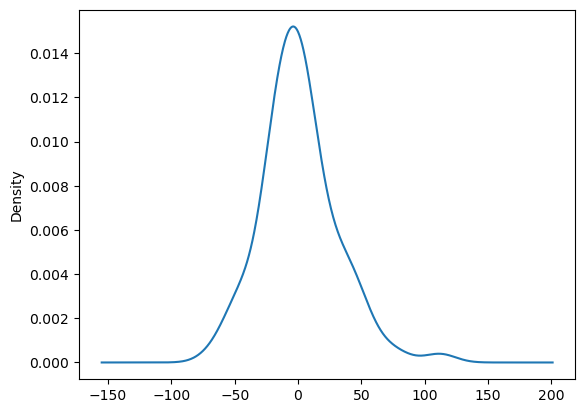

In [282]:
model_Arima_fit.resid.plot(kind='kde')

In [284]:
test_data['Predicted_ARIMA']=pred

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12624\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

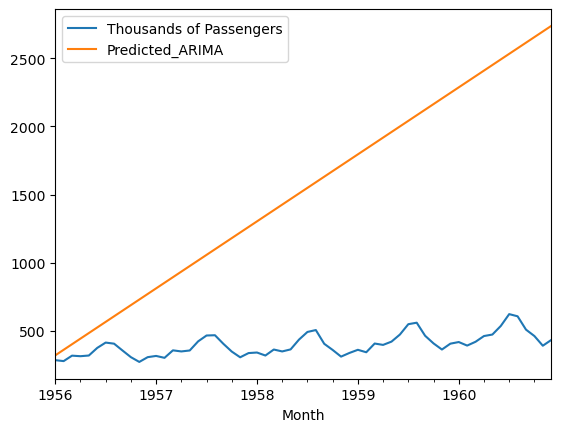

In [292]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

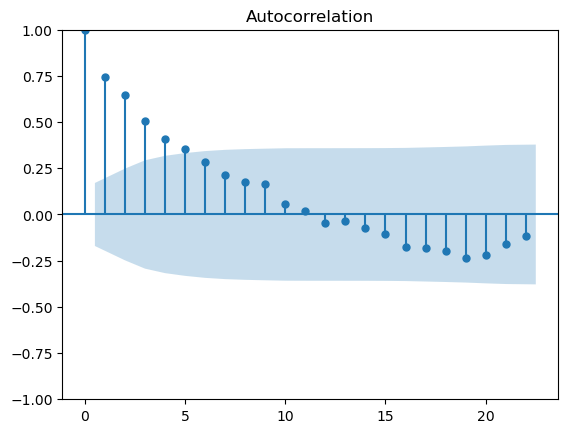

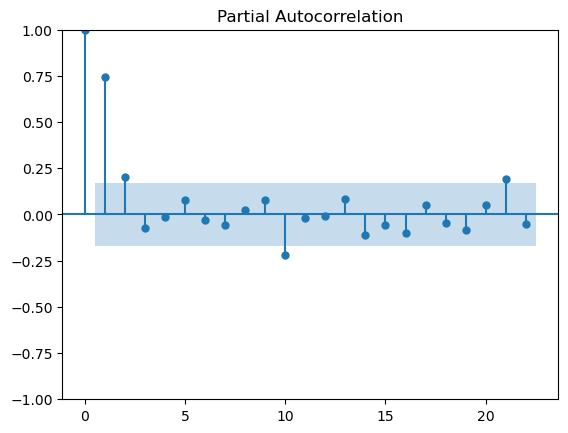

In [288]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [296]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [298]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [302]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [304]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Sat, 29 Jun 2024   AIC                            548.481
Time:                                     20:13:43   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5982      0.937      0.638      0.523      -1.239       2.435
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.164      0.158      0.874      -2.097       2.465
ma.L2         -0.5340      1.262     -0.423      0.672      -3.007       1.939
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1273      0.337     -0.377      0.706      -0.788       0.534
ma.L5          0.2471      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7334     81.111      1.082      0.279     -71.240     246.707
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [306]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,2574.0
1960-09-01,508.0,-98.0,-82.0,45.0,2615.0
1960-10-01,461.0,-47.0,51.0,54.0,2656.0
1960-11-01,390.0,-71.0,-24.0,28.0,2697.0
1960-12-01,432.0,42.0,113.0,27.0,2738.0


In [308]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [310]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

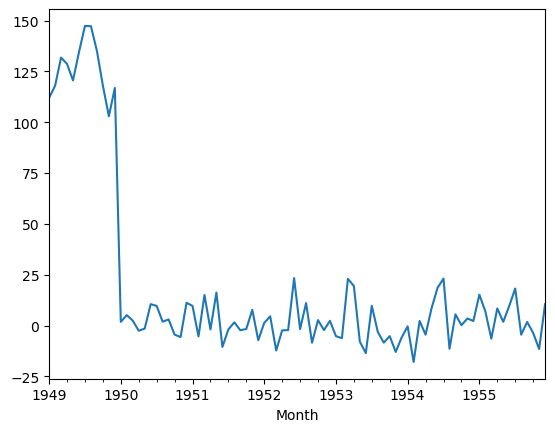

In [312]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

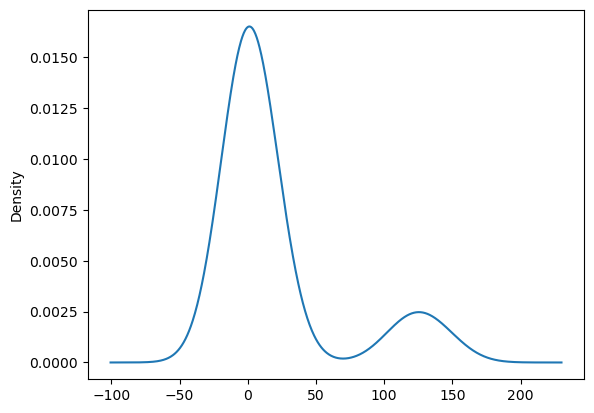

In [314]:
model_SARIMA_fit.resid.plot(kind='kde')

In [316]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12624\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [318]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,319.0,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,360.0,NaN
1956-03-01,317.0,40.0,47.0,50.0,401.0,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,442.0,NaN
1956-05-01,318.0,5.0,9.0,48.0,483.0,NaN
1956-06-01,374.0,56.0,51.0,59.0,524.0,NaN
1956-07-01,413.0,39.0,-17.0,49.0,565.0,403.397378
1956-08-01,405.0,-8.0,-47.0,58.0,606.0,385.070356
1956-09-01,355.0,-50.0,-42.0,43.0,647.0,349.444809


<Axes: xlabel='Month'>

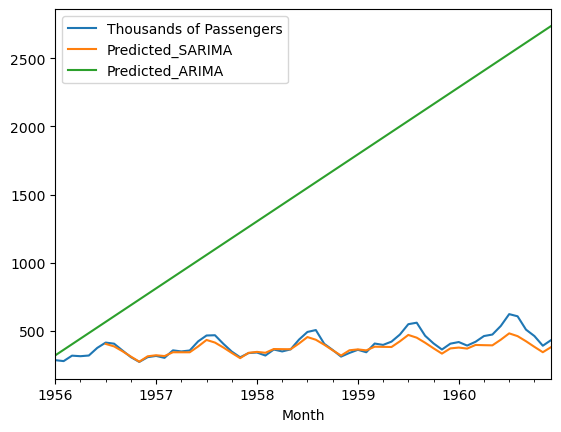

In [320]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()

## Thank you !😀